In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer


## Predicting the Genre of Books from Summaries

I'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) and includes meta-data about the genre of the books taken from Freebase.  Each book can have more than one genre and there are 227 genres listed in total.  To simplify the problem of genre prediction I will select a small number of target genres that occur frequently in the collection and select the books with these genre labels.  This will give us one genre label per book. 

My goal in this portfolio is to take this data and build predictive models to classify the books into one of the five target genres.  I will need to extract suitable features from the texts and select suitable models to classify them. I should build and evaluate at least TWO models and compare the prediction results.

## Data Preparation

The first thing to do is reading the data. It is made available in tab-separated format but has no column headings. I can use `read_csv` to read this but I need to set the separator to `\t` (tab) and supply the column names. 

In [2]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


next filter the data so that only my target genre labels are included and I assign each text to just one of the genre labels.  It's possible that one text could be labelled with two of these labels (eg. Science Fiction and Fantasy) but I will just assign one of those here. 

In [96]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [97]:
genre_books.groupby('genre').count()

,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


<h2>check how many books we have in each genre category</h2>

In [98]:
genre_books.head()

,title,author,date,summary,genre
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy


In [99]:
genre_books.shape

(8954, 5)

## Feature Exaction

Now build a suitable model and present results.

Firstly, I need to perform feature extraction to produce feature vectors for the predictive models.

In [100]:
Y=books.genre

In [101]:
vectorizer=TfidfVectorizer(max_features=100,stop_words='english')
X=vectorizer.fit_transform(books.summary).toarray()


<h2>vectorized the texts in books summary columns</h2>

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)

In [105]:
X_train.shape, y_train.shape

((13247, 100), (13247,))

In [111]:
X_test.shape, y_test.shape

((3312, 100), (3312,))

## Model Training

Then, train two predictive models from the given data set.

<br></br>
<h1>1.LogisticRegression model</h1>

In [106]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

c:\users\gnp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Logistic Regression Model Evaluation


In [107]:
y_pred=lr.predict(X_test)

In [120]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[1368,   16,   77,   28,   17,   50],
       [ 166,   18,   19,    0,    1,    1],
       [ 275,    3,  135,    2,    1,   29],
       [ 230,    4,    9,   21,    1,    6],
       [ 391,    6,   14,    5,   10,   32],
       [ 222,    3,   46,    4,    0,  102]], dtype=int64)

<AxesSubplot:>

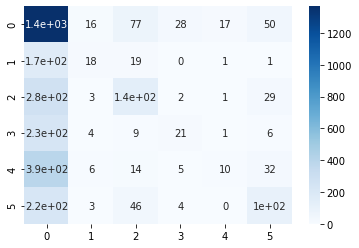

In [121]:
import seaborn as sns
sns.heatmap(cf, annot=True, cmap='Blues')

In [145]:
print("logistic regression's accuracy_score: "+str(accuracy_score(y_test,y_pred))+"\nlogistic regression's F1_score: "+str(f1_score(y_test,y_pred,average='micro')))

logistic regression's accuracy_score: 0.4993961352657005
logistic regression's F1_score: 0.4993961352657005


<br></br>
<h1>2. Gaussian Naive Bayes</h1>

In [146]:
from sklearn.naive_bayes import GaussianNB


In [147]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [148]:
y_pred_clf=clf.predict(X_test)

In [150]:
cf=confusion_matrix(y_test,y_pred_clf)
cf

array([[240, 321, 159, 267, 263, 306],
       [ 13, 109,  24,  21,  20,  18],
       [ 39,  67, 164,  46,  39,  90],
       [ 18,  56,  17, 120,  30,  30],
       [ 54,  95,  26,  75, 118,  90],
       [ 29,  24,  49,  29,  32, 214]], dtype=int64)

<AxesSubplot:>

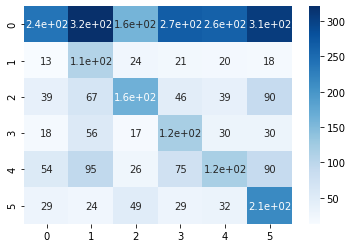

In [151]:
sns.heatmap(cf, annot=True, cmap='Blues')

In [152]:
print("Gaussian Naive Bayes' accuracy_score: "+str(accuracy_score(y_test,y_pred_clf))+"\nGaussian Naive Bayes' F1_score: "+str(f1_score(y_test,y_pred_clf,average='micro')))

Gaussian Naive Bayes' accuracy_score: 0.2913647342995169
Gaussian Naive Bayes' F1_score: 0.2913647342995169



<h2>there are no difference between accuracy score and f1 score because testing,traing file is randomly distributed so from next model i just used accuracy score to compare </h2>

<br></br>
<h1>3. Multinomial Naive bayes</h1>

In [202]:
from sklearn.naive_bayes import MultinomialNB

In [203]:
clf2 = MultinomialNB()
clf2.fit(X_train,y_train)

MultinomialNB()

In [204]:
y_pred_clf2=clf2.predict(X_test)

In [205]:
cf=confusion_matrix(y_test,y_pred_clf2)
cf

array([[1538,    0,    2,    0,    0,   16],
       [ 204,    0,    1,    0,    0,    0],
       [ 423,    0,    8,    0,    0,   14],
       [ 269,    0,    0,    0,    0,    2],
       [ 441,    0,    0,    0,    0,   17],
       [ 320,    0,    3,    0,    0,   54]], dtype=int64)

<AxesSubplot:>

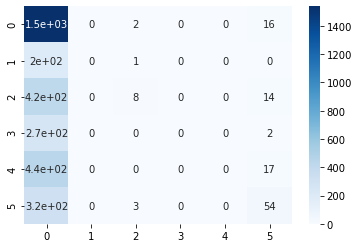

In [206]:
sns.heatmap(cf, annot=True, cmap='Blues')

In [207]:
print("Multinomial Naive Bayes' accuracy_score: "+str(accuracy_score(y_test,y_pred_clf2)))

Multinomial Naive Bayes' accuracy_score: 0.4830917874396135


<br></br>
<h1>4.Bernoulli Naive Bayes</h1>

In [161]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)

In [162]:
cf=confusion_matrix(y_test,y_pred_clf)
cf

array([[1002,   78,  213,   30,  128,  105],
       [ 103,   52,   30,    2,   13,    5],
       [ 187,   13,  178,    5,   13,   49],
       [ 153,   17,   50,   23,   16,   12],
       [ 251,   31,   66,    7,   70,   33],
       [ 146,    2,  111,    2,    8,  108]], dtype=int64)

<AxesSubplot:>

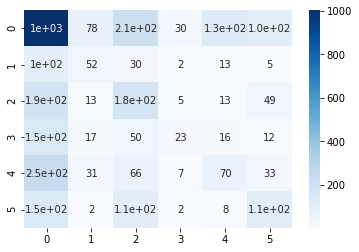

In [163]:
sns.heatmap(cf, annot=True, cmap='Blues')

In [164]:
print("Bernoulli Naive Bayes' accuracy_score: "+str(accuracy_score(y_test,y_pred_clf)))

Bernoulli Naive Bayes' accuracy_score: 0.43266908212560384


<br></br>
<h1>5.Complement Naive Bayes</h1>

In [176]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)

In [177]:
cf=confusion_matrix(y_test,y_pred_clf)
cf

array([[718, 186, 214, 117,  93, 228],
       [ 59,  79,  36,   7,   8,  16],
       [ 72,  36, 196,  32,  20,  89],
       [ 91,  41,  23,  82,  12,  22],
       [203,  55,  34,  35,  63,  68],
       [ 46,  23,  59,  16,  19, 214]], dtype=int64)

<AxesSubplot:>

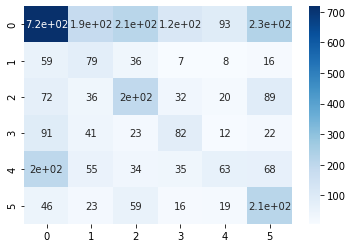

In [178]:
sns.heatmap(cf, annot=True, cmap='Blues')

In [179]:
print("Complement Naive Bayes' accuracy_score: "+str(accuracy_score(y_test,y_pred_clf)))

Complement Naive Bayes' accuracy_score: 0.4082125603864734


<br></br>
<h1>6.KNeighborsClassifier</h1>

In [180]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred_neigh=neigh.predict(X_test)

In [181]:
cf=confusion_matrix(y_test,y_pred_neigh)
cf

array([[1175,   59,   98,   52,  100,   72],
       [ 145,   28,   10,    3,   16,    3],
       [ 266,   22,   90,   11,   11,   45],
       [ 195,   15,   17,   26,   15,    3],
       [ 326,   26,   30,    9,   43,   24],
       [ 228,    4,   42,    8,   12,   83]], dtype=int64)

<AxesSubplot:>

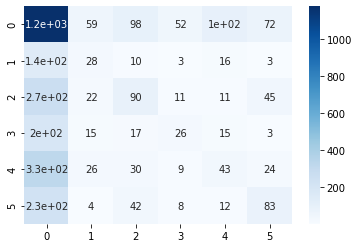

In [182]:
sns.heatmap(cf, annot=True, cmap='Blues')

In [183]:
print("KNeighborsClassifier's accuracy_score: "+str(accuracy_score(y_test,y_pred_neigh)))

KNeighborsClassifier's accuracy_score: 0.43629227053140096


<br></br>
<h1>7. Evaluation </h1>

<h2>
The models are listed in order of accuracy.</h2>
<br></br>
<h3>1.logistic regression's accuracy_score: 0.4993961352657005 </h3>
<h3>2.Multinomial Naive Bayes' accuracy_score: 0.4830917874396135 </h3>
<h3>3.KNeighborsClassifier's accuracy_score: 0.43629227053140096 </h3>
<h3>4.Bernoulli Naive Bayes' accuracy_score: 0.43266908212560384 </h3>
<h3>5.Complement Naive Bayes' accuracy_score: 0.4082125603864734  </h3>
<h3>6.Gaussian Naive Bayes' accuracy_score: 0.2913647342995169 </h3><br></br>
<h1>Evaluation-1(Logistic regression)</h1>
<h2>Logistic regression is the model that is most accurate.</h2>
<h2>Logistic Regression uses a different method for estimating the parameters, which gives better results(unbiased, with lower variances.) and don't need naive assumption compare to Naive Bayes models</h2><br></br>
<h1>Evaluation-2(Naive Bayes)</h1>
<h2>There are 4 types of Naive Bayes models, and two models(Multinomial Naive Bayes,Bernoulli Naive Bayes)are relatively more accurate than Complement Naive Bayes and Gaussian Naive Bayes</h2>
<h2>Reasons why Multinomial Naive Bayes and Bernoulli Naive Bayes are more accurate: BernoulliNB applies to binary data and MultinomialNB applies to count data. so BernoulliNB, MultinomialNB are mostly used to classify text data.</h2>
<h2>
These two naive Bayes models are used to count sparse data such as text. MultinomialNB usually outperforms BernoulliNB on datasets with relatively many non-zero features. so MultinomialNB is more accurate this time because summary column is really long and max_feature is more than 100.</h2>
<h2>ComplementNB implements the complement naive Bayes (CNB) algorithm, which is particularly suited for imbalanced data sets. but this testing, training dataset is randomly distributed and balanced so other Naive bayes models like Multinomial, Bernoulli is more accurate then complementNB.</h2>
<h2>
The naive Bayes model and the linear model have similar advantages and disadvantages. Training and prediction speed is fast, and the training process is easy to understand. It works well on sparse high-dimensional data, and is relatively insensitive to parameters. For very large data sets that take too long to learn with a linear model, the Naive Bayes model is worth trying, and is often used.</h2>
<br></br>
<h1>Evaluation-3(KNN)</h1>
<h2>
KNN models: If the amount of training data is large, the classification speed is slow (in fact, because there is no separate learning process because pre-calculation is not possible, the classification speed is slow)
Larger dimensions (vectors) increase the amount of computation. In that reason KNN is not the best model for text data classification.
so KNN is less accurate than logistic regression and Multinomial Naive Bayes here.</h2>